In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [2]:
cases = pd.read_csv("data/time_series_covid19_confirmed_US.csv")
cases.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key'], inplace=True, axis=1)
cases = cases.melt()
cases = cases.groupby("variable").sum().reset_index()
cases["date"] = cases["variable"].apply(pd.to_datetime)
cases

,variable,value,date
0,1/22/20,1,2020-01-22
1,1/23/20,1,2020-01-23
2,1/24/20,2,2020-01-24
3,1/25/20,2,2020-01-25
4,1/26/20,5,2020-01-26
...,...,...,...
83,4/5/20,337072,2020-04-05
84,4/6/20,366667,2020-04-06
85,4/7/20,397505,2020-04-07
86,4/8/20,429052,2020-04-08


In [3]:
vix = pd.read_csv("data/^VIX.csv")
vix["Date"] = vix["Date"].apply(pd.to_datetime)
vix

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-22,13.210000,13.360000,12.380000,12.420000,12.420000,0
1,2019-04-23,12.660000,12.690000,12.080000,12.280000,12.280000,0
2,2019-04-24,12.530000,13.230000,12.260000,13.140000,13.140000,0
3,2019-04-25,13.290000,14.300000,12.810000,13.250000,13.250000,0
4,2019-04-26,13.440000,13.620000,12.490000,12.730000,12.730000,0
...,...,...,...,...,...,...,...
247,2020-04-14,40.240002,40.570000,37.310001,37.759998,37.759998,0
248,2020-04-15,42.570000,43.230000,40.049999,40.840000,40.840000,0
249,2020-04-16,41.919998,43.020000,39.869999,40.110001,40.110001,0
250,2020-04-17,39.500000,40.259998,37.630001,38.150002,38.150002,0


In [55]:
merged = pd.merge(cases, vix, left_on="date", right_on="Date")
merged

,variable,value,date,Date,Open,High,Low,Close,Adj Close,Volume
0,1/22/20,1,2020-01-22,2020-01-22,12.450000,13.010000,12.310000,12.910000,12.910000,0
1,1/23/20,1,2020-01-23,2020-01-23,13.260000,14.150000,12.940000,12.980000,12.980000,0
2,1/24/20,2,2020-01-24,2020-01-24,12.750000,15.980000,12.620000,14.560000,14.560000,0
3,1/27/20,5,2020-01-27,2020-01-27,17.420000,19.020000,16.820000,18.230000,18.230000,0
4,1/28/20,5,2020-01-28,2020-01-28,16.940001,18.030001,15.690000,16.280001,16.280001,0
...,...,...,...,...,...,...,...,...,...,...
56,4/3/20,275586,2020-04-03,2020-04-03,51.110001,52.290001,46.740002,46.799999,46.799999,0
57,4/6/20,366667,2020-04-06,2020-04-06,44.169998,45.730000,43.450001,45.240002,45.240002,0
58,4/7/20,397505,2020-04-07,2020-04-07,44.830002,47.509998,43.509998,46.700001,46.700001,0
59,4/8/20,429052,2020-04-08,2020-04-08,45.900002,47.279999,42.529999,43.349998,43.349998,0


In [58]:
m = LinearRegression().fit(merged["value"].values.reshape((-1, 1)), merged["Close"])
mean_absolute_error(merged["Close"], m.predict(merged["value"].values.reshape((-1, 1))))

17.165879079159566

In [59]:
max(merged["Close"])

82.690002

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

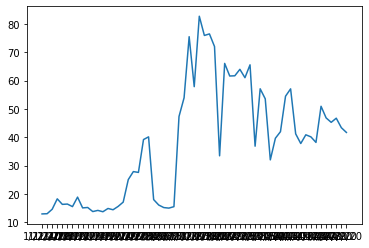

In [62]:
plt.plot(merged["variable"], merged["Close"])

In [3]:
data = pd.read_csv("04-18-2020.csv")

In [4]:
data = data[data["Country_Region"] == "US"]

In [5]:
data = data.drop(["Recovered", "People_Hospitalized", "Hospitalization_Rate"], axis=1).drop(116)

In [6]:
data.isna().sum()

Province_State    0
Country_Region    0
Last_Update       1
Lat               2
Long_             2
Confirmed         0
Deaths            0
Active            1
FIPS              0
Incident_Rate     2
People_Tested     2
Mortality_Rate    1
UID               0
ISO3              0
Testing_Rate      2
dtype: int64

In [7]:
data.dropna().shape

(55, 15)

In [16]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
data.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'Mortality_Rate', 'UID', 'ISO3', 'Testing_Rate'],
      dtype='object')

In [18]:
features = ["Confirmed", "Deaths", "Incident_Rate", "People_Tested", "Mortality_Rate", "Testing_Rate", "Active"]

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [20]:
train, test = train_test_split(data)

In [22]:
def process(data, ylabel):
    data = data.dropna(subset=features)
    Xfeat = [l for l in data.columns if (l in features and l != ylabel)]
    X = data[Xfeat]
    y = data[ylabel]
    return X, y

In [23]:
X_train, y_train = process(train, "Mortality_Rate")
X_test, y_test = process(test, "Mortality_Rate")

In [31]:
for col in features:
    X_train, y_train = process(train, col)
    X_test, y_test = process(test, col)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_fitted = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Predicting: {}".format(col))
    print("\tTraining Errors: {}\t{}".format(np.sqrt(mean_squared_error(y_train, y_fitted)), 
                                       mean_absolute_error(y_train, y_fitted)))
    print("\tTesting Errors: {}\t{}".format(np.sqrt(mean_squared_error(y_test, y_pred)), 
                                       mean_absolute_error(y_test, y_pred)))

Predicting: Confirmed
	Training Errors: 5.478158305916217e-11	2.6305331896476606e-11
	Testing Errors: 1.4485812390914577e-11	1.2100542789994506e-11
Predicting: Deaths
	Training Errors: 2.656752273939017e-11	1.7241362808995403e-11
	Testing Errors: 1.5435810980282094e-11	1.3852395421208387e-11
Predicting: Incident_Rate
	Training Errors: 53.38792327933146	40.28168660929744
	Testing Errors: 107.44748334796904	72.83969315020765
Predicting: People_Tested
	Training Errors: 20240.878025921822	15100.010488325199
	Testing Errors: 49355.86634328043	30953.59806823904
Predicting: Mortality_Rate
	Training Errors: 1.0045839980780837	0.8656506488287223
	Testing Errors: 3.0472057935670542	1.74680862927393
Predicting: Testing_Rate
	Training Errors: 316.37778354760013	267.2915755659911
	Testing Errors: 553.0090760178732	367.6221211654401
Predicting: Active
	Training Errors: 3.5324645245916925e-11	1.8651573510596347e-11
	Testing Errors: 2.418038980027244e-11	1.804080694358033e-11


In [35]:
for col in features:
    X_train, y_train = process(train, col)
    X_test, y_test = process(test, col)
    model = GridSearchCV(Ridge(), {"alpha": np.geomspace(1e-15, 1e3, 10)})
    model.fit(X_train, y_train)
    y_fitted = model.best_estimator_.predict(X_train)
    y_pred = model.best_estimator_.predict(X_test)
    print("Predicting: {}".format(col))
    print("\t", model.best_estimator_)
    print("\tTraining Errors: {}\t{}".format(np.sqrt(mean_squared_error(y_train, y_fitted)), 
                                       mean_absolute_error(y_train, y_fitted)))
    print("\tTesting Errors: {}\t{}".format(np.sqrt(mean_squared_error(y_test, y_pred)), 
                                       mean_absolute_error(y_test, y_pred)))

Predicting: Confirmed
	 Ridge(alpha=1e-15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
	Training Errors: 5.960430183675086e-11	4.265751979291076e-11
	Testing Errors: 1.5024940484922603e-10	8.377210036769611e-11
Predicting: Deaths
	 Ridge(alpha=1e-15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
	Training Errors: 5.54563737179468e-09	3.816962247626413e-09
	Testing Errors: 1.4411217815422034e-08	7.710181572560617e-09
Predicting: Incident_Rate
	 Ridge(alpha=1e-11, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
	Training Errors: 53.38792327933145	40.28168660929335
	Testing Errors: 107.44748334795115	72.8396931501937
Predicting: People_Tested
	 Ridge(alpha=1e-15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
	Training Errors: